## Install Libraries

In [ ]:
!pip install nltk pandas scikit-learn wordcloud gensim pyLDAvis scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.9 MB/s eta 0:00:00


## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/CMPE_257/news_category_dataset.json'

Mounted at /content/drive


## Preparing Data

In [ ]:
# 1. Load the data
import pandas as pd

df = pd.read_json(file_path, lines=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48442 entries, 0 to 48441
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               48442 non-null  object        
 1   headline           48442 non-null  object        
 2   category           48442 non-null  object        
 3   short_description  48442 non-null  object        
 4   authors            48442 non-null  object        
 5   date               48442 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 2.2+ MB


#### Handling Missing Values

In [ ]:
# 1. Create text column first
df['text'] = df['headline'] + ' ' + df['short_description']

# 2. Handle missing values
df = df.fillna({'short_description': '', 'authors': 'Unknown'})

#### Text Preprocessing

In [ ]:
import nltk
import re # Import the re module for regular expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt') # Download punkt data package
nltk.download('punkt_tab') # Download punkt_tab data package

# Create text column
df['text'] = df['headline'] + ' ' + df['short_description']

# Handle missing values
df = df.fillna({'short_description': '', 'authors': 'Unknown'})

# Text preprocessing without lemmatization for now
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


## Exploratory Data Analysis of News Articles Dataset

In [ ]:
# Extract year from date column
df['year'] = df['date'].dt.year

# Basic statistics
print("Dataset Overview:")
print(f"Total articles: {len(df):,}")
print(f"Date range: {df['date'].min().year} to {df['date'].max().year}")

# Category analysis
print("\nTop 5 Categories:")
print(df['category'].value_counts().head())




Dataset Overview:
Total articles: 48,442
Date range: 2012 to 2022

Top 5 Categories:
category
GREEN            1160
MONEY            1160
U.S. NEWS        1160
HOME & LIVING    1160
PARENTS          1160
Name: count, dtype: int64


In [ ]:
# Time distribution
yearly_counts = df.groupby('year').size()
print("\nArticles per year:")
print(yearly_counts)

# Create length features
df['headline_length'] = df['headline'].str.len()
df['description_length'] = df['short_description'].str.len()


Articles per year:
year
2012    6235
2013    6639
2014    8806
2015    9027
2016    7444
2017    6359
2018    1858
2019     718
2020     429
2021     513
2022     414
dtype: int64


In [ ]:
# Basic content stats
print("Content Length Statistics:")
print(df[['headline_length', 'description_length']].describe())

# Category distribution
print("\nCategory Distribution:")
print(df['category'].value_counts(normalize=True).head(10))



Content Length Statistics:
       headline_length  description_length
count     48442.000000        48442.000000
mean         58.298646          113.686285
std          18.416684           83.990601
min           0.000000            0.000000
25%          46.000000           54.000000
50%          59.000000          120.000000
75%          71.000000          137.000000
max         202.000000         1472.000000

Category Distribution:
category
GREEN            0.023946
MONEY            0.023946
U.S. NEWS        0.023946
HOME & LIVING    0.023946
PARENTS          0.023946
TRAVEL           0.023946
FIFTY            0.023946
WEIRD NEWS       0.023946
BLACK VOICES     0.023946
ARTS             0.023946
Name: proportion, dtype: float64


In [ ]:
# Time analysis
print("\nYearly Article Counts:")
print(df.groupby('year').size().sort_values(ascending=False))

# Author analysis
print("\nTop Authors:")
print(df['authors'].value_counts().head())


Yearly Article Counts:
year
2015    9027
2014    8806
2016    7444
2013    6639
2017    6359
2012    6235
2018    1858
2019     718
2021     513
2020     429
2022     414
dtype: int64

Top Authors:
authors
                    8901
Lee Moran            721
Priscilla Frank      526
Ron Dicker           509
Reuters, Reuters     387
Name: count, dtype: int64


## CONCLUSION: What Data Says?



### Dataset Overview
- Total articles: 48,442 spanning 2012-2022
- Peak publishing years: 2014-2015 (~9,000 articles/year)
- Significant decline after 2018 (<2,000 articles/year)

## Content Analysis
- Headlines: Average length 58 characters (range: 0-202)
- Descriptions: Average length 114 characters (range: 0-1,472)
- Most articles have descriptions 54-137 characters long

## Category Distribution
- Equal distribution across top categories (2.4% each):
  - GREEN, MONEY, U.S. NEWS, HOME & LIVING, PARENTS, etc.

## Author Insights
- Top contributors:
  - Unknown/Unattributed: 8,901 articles
  - Lee Moran: 721 articles
  - Priscilla Frank: 526 articles
  - Reuters: 387 articles

## Key Trends
- Peak content production: 2014-2015
- Sharp decline post-2018
- Consistent content length despite volume changes
- Even category distribution suggests balanced coverage

# CLUSTERING ALGORITHMS

## DBSCAN CLUSTERING : SHUBHAM

### Target Features:
1. Text Features:
   - Headlines
   - Short descriptions
   - Combined text (headline + description)
   - TF-IDF vectorization (1000 features)
   - N-grams (unigrams and bigrams)

### Evaluation Metrics:
1. Cluster Quality Metrics:
   - Silhouette Score (range: -1 to 1, higher is better)
   - Calinski-Harabasz Index (higher is better)
   - Davies-Bouldin Index (lower is better)   

2. Statistical Metrics:
   - Number of clusters formed
   - Noise point percentage
   - Cluster size distribution
   - Category distribution per cluster   

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Load the data
df = pd.read_json(file_path, lines=True)
df.info()

# 2. Prepare the text data
df['text'] = df['headline'] + ' ' + df['short_description']

# 3. Split into training and testing
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48442 entries, 0 to 48441
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               48442 non-null  object        
 1   headline           48442 non-null  object        
 2   category           48442 non-null  object        
 3   short_description  48442 non-null  object        
 4   authors            48442 non-null  object        
 5   date               48442 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 2.2+ MB


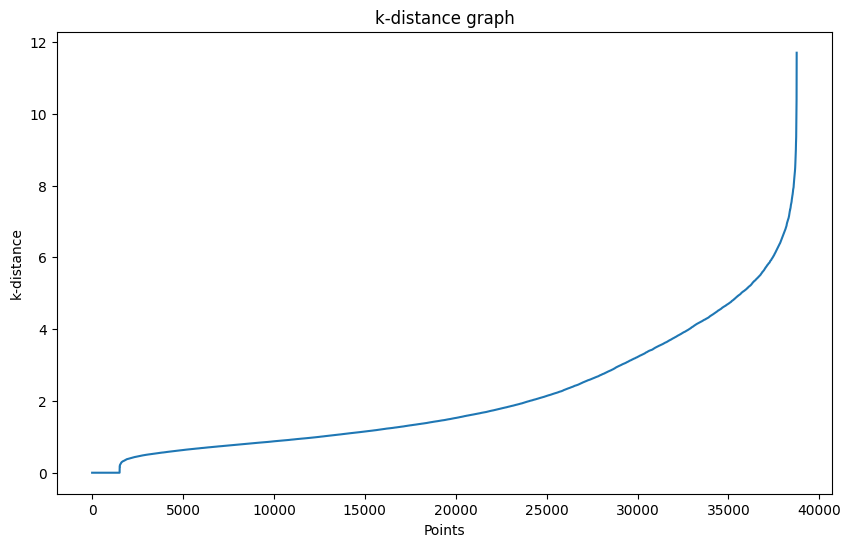

In [ ]:
# 4. Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2)
)

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
# Transform test data
X_test_tfidf = vectorizer.transform(X_test['text'])

# 5. Dimensionality reduction using PCA (DBSCAN works better with reduced dimensions)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

# 6. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# 7. Find optimal eps using k-distance graph
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_train_scaled)
distances, indices = neighbors_fit.kneighbors(X_train_scaled)
distances = np.sort(distances[:, 1])

# Plot k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('k-distance')
plt.title('k-distance graph')
plt.show()

In [ ]:
# 8. Train DBSCAN model
# Choose eps based on the elbow in k-distance graph
dbscan = DBSCAN(
    eps=0.5,  # Adjust based on k-distance graph
    min_samples=5,
    metric='euclidean'
)

# Fit on training data
train_clusters = dbscan.fit_predict(X_train_scaled)

# Predict on test data
test_clusters = dbscan.fit_predict(X_test_scaled)

# 9. Analyze Results
# Add cluster labels to dataframes
X_train['Cluster'] = train_clusters
X_test['Cluster'] = test_clusters

# Print cluster distribution
print("\nTraining Data Cluster Distribution:")
print(X_train['Cluster'].value_counts())

print("\nTest Data Cluster Distribution:")
print(X_test['Cluster'].value_counts())


Training Data Cluster Distribution:
Cluster
-1     37035
 0      1029
 10       26
 17       20
 29       16
       ...  
 56        5
 87        5
 13        4
 79        4
 89        4
Name: count, Length: 95, dtype: int64

Test Data Cluster Distribution:
Cluster
-1    9473
 0     194
 2       6
 4       6
 3       5
 1       5
Name: count, dtype: int64


In [ ]:
# 10. Analyze clusters (excluding noise points labeled as -1)
unique_clusters = np.unique(train_clusters)
for cluster in unique_clusters:
    if cluster != -1:  # Skip noise points
        print(f"\nCluster {cluster} Analysis:")
        cluster_docs = X_train[X_train['Cluster'] == cluster]

        print("Size:", len(cluster_docs))
        print("\nTop Categories:")
        print(cluster_docs['category'].value_counts().head())

        # Get center of cluster
        cluster_tfidf = X_train_tfidf[X_train['Cluster'] == cluster]
        cluster_center = cluster_tfidf.mean(axis=0).A1  # Convert to 1D array

        # Get top terms
        top_terms_idx = np.argsort(cluster_center)[-10:][::-1]
        feature_names = vectorizer.get_feature_names_out()
        top_terms = [feature_names[i] for i in top_terms_idx]
        print(f"\nTop terms: {', '.join(top_terms)}")


Cluster 0 Analysis:
Size: 1029

Top Categories:
category
WORLDPOST         116
RELIGION           61
ARTS               57
HEALTHY LIVING     55
TASTE              49
Name: count, dtype: int64

Top terms: israel, hurricane, pope, iraq, storm, guide, syria, goes, india, battle

Cluster 1 Analysis:
Size: 8

Top Categories:
category
STYLE             2
ARTS & CULTURE    1
ARTS              1
SCIENCE           1
GREEN             1
Name: count, dtype: int64

Top terms: way, youtube, finds, fox, forward, form, forget, force, football, foods

Cluster 2 Analysis:
Size: 9

Top Categories:
category
WEIRD NEWS    3
ARTS          2
CRIME         1
GOOD NEWS     1
RELIGION      1
Name: count, dtype: int64

Top terms: man, youtube, finds, fox, forward, form, forget, force, football, foods

Cluster 3 Analysis:
Size: 5

Top Categories:
category
GREEN      1
PARENTS    1
ARTS       1
WOMEN      1
STYLE      1
Name: count, dtype: int64

Top terms: real, youtube, flight, fox, forward, form, forget, for


Noise points ratio (Training): 0.956
Noise points ratio (Testing): 0.978


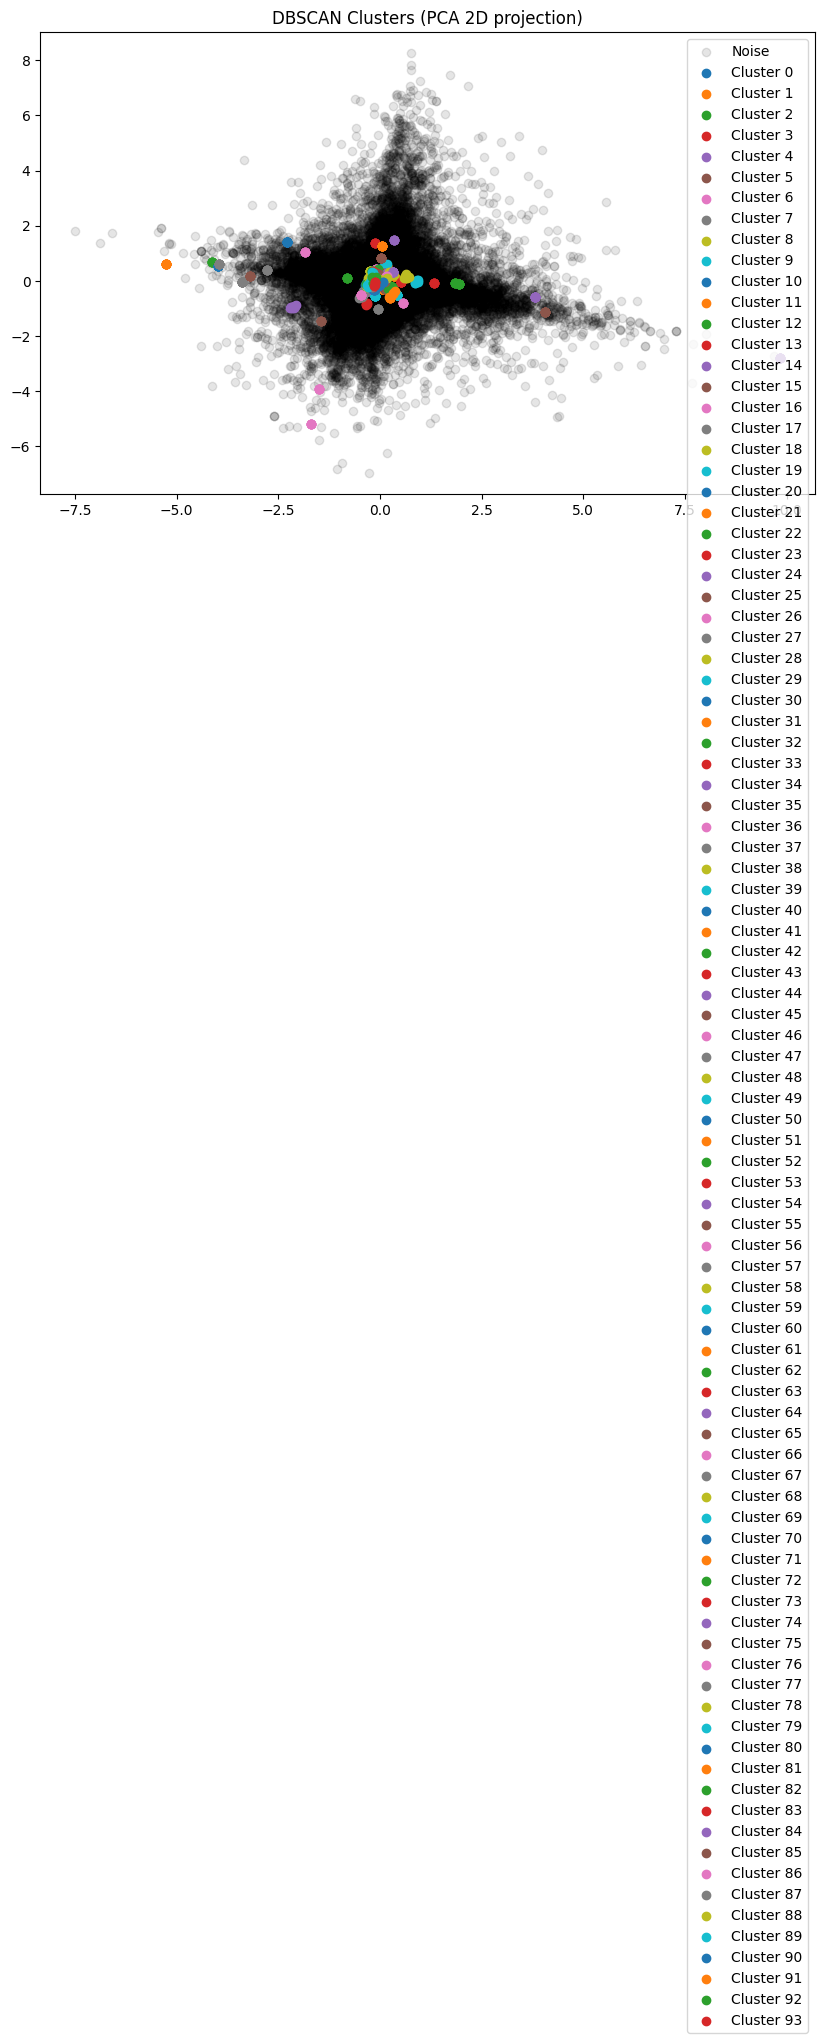


Silhouette Score (excluding noise): 0.396


In [ ]:
# 11. Calculate percentage of noise points
noise_ratio_train = (train_clusters == -1).sum() / len(train_clusters)
noise_ratio_test = (test_clusters == -1).sum() / len(test_clusters)

print(f"\nNoise points ratio (Training): {noise_ratio_train:.3f}")
print(f"Noise points ratio (Testing): {noise_ratio_test:.3f}")

# 12. Visualize clusters using PCA (2D projection)
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_2d[train_clusters == -1, 0], X_train_2d[train_clusters == -1, 1],
           c='black', label='Noise', alpha=0.1)

for cluster in unique_clusters:
    if cluster != -1:
        cluster_points = X_train_2d[train_clusters == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   label=f'Cluster {cluster}')

plt.legend()
plt.title('DBSCAN Clusters (PCA 2D projection)')
plt.show()

# 13. Print silhouette score (excluding noise points)
valid_points = train_clusters != -1
if len(np.unique(train_clusters[valid_points])) > 1:  # Need at least 2 clusters
    silhouette_avg = silhouette_score(X_train_scaled[valid_points],
                                    train_clusters[valid_points])
    print(f"\nSilhouette Score (excluding noise): {silhouette_avg:.3f}")

## Deep Clustering Network (DCN) CLUSTERING: SHUBHAM

### Target Features:
1. Text Features:
   - Headlines
   - Short descriptions
   - Combined text (headline + description)
   - TF-IDF vectorization (1000 features)
   - N-grams (unigrams and bigrams)

### Evaluation Metrics:
1. Cluster Quality Metrics:
   - Silhouette Score (range: -1 to 1, higher is better)
   - Calinski-Harabasz Index (higher is better)
   - Davies-Bouldin Index (lower is better)   

2. Statistical Metrics:
   - Number of clusters formed
   - Noise point percentage
   - Cluster size distribution
   - Category distribution per cluster   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

class DCN(nn.Module):
   def __init__(self, input_dim=1000, hidden_dims=[512, 256, 128], n_clusters=20):
       super().__init__()
       self.encoder = nn.Sequential(
           nn.Linear(input_dim, hidden_dims[0]),
           nn.ReLU(),
           nn.BatchNorm1d(hidden_dims[0]),
           nn.Dropout(0.3),
           nn.Linear(hidden_dims[0], hidden_dims[1]),
           nn.ReLU(),
           nn.BatchNorm1d(hidden_dims[1]),
           nn.Dropout(0.3),
           nn.Linear(hidden_dims[1], hidden_dims[2])
       )

       self.decoder = nn.Sequential(
           nn.Linear(hidden_dims[2], hidden_dims[1]),
           nn.ReLU(),
           nn.BatchNorm1d(hidden_dims[1]),
           nn.Dropout(0.3),
           nn.Linear(hidden_dims[1], hidden_dims[0]),
           nn.ReLU(),
           nn.BatchNorm1d(hidden_dims[0]),
           nn.Dropout(0.3),
           nn.Linear(hidden_dims[0], input_dim)
       )

       self.clustering = nn.Sequential(
           nn.Linear(hidden_dims[2], n_clusters),
           nn.Softmax(dim=1)
       )

   def forward(self, x):
       encoded = self.encoder(x)
       decoded = self.decoder(encoded)
       clusters = self.clustering(encoded)
       return encoded, decoded, clusters

In [ ]:
def train_model(X_train, X_test, n_epochs=100, batch_size=128, n_clusters=20):
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

   X_train_tensor = torch.FloatTensor(X_train.toarray()).to(device)
   X_test_tensor = torch.FloatTensor(X_test.toarray()).to(device)

   train_dataset = TensorDataset(X_train_tensor)
   train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

   model = DCN(n_clusters=n_clusters).to(device)
   optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
   scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

   best_loss = float('inf')

   for epoch in range(n_epochs):
       model.train()
       total_loss = 0
       for batch_idx, (data,) in enumerate(train_loader):
           optimizer.zero_grad()

           encoded, decoded, clusters = model(data)

           # Reconstruction loss
           rec_loss = nn.MSELoss()(decoded, data)

           # Clustering loss with target distribution
           cluster_probs = clusters
           target_distribution = torch.pow(cluster_probs, 2) / torch.sum(cluster_probs, dim=0)
           target_distribution = target_distribution / torch.sum(target_distribution, dim=1, keepdim=True)
           cluster_loss = -torch.mean(torch.sum(target_distribution * torch.log(cluster_probs + 1e-6), dim=1))

           # Total loss
           loss = rec_loss + 0.1 * cluster_loss
           loss.backward()
           optimizer.step()

           total_loss += loss.item()

       avg_loss = total_loss / len(train_loader)
       scheduler.step(avg_loss)

       if avg_loss < best_loss:
           best_loss = avg_loss
           torch.save(model.state_dict(), 'best_model.pth')

       if epoch % 10 == 0:
           print(f'Epoch {epoch}, Loss: {avg_loss:.4f}')

   # Load best model
   model.load_state_dict(torch.load('best_model.pth'))
   model.eval()

   with torch.no_grad():
       _, _, train_clusters = model(X_train_tensor)
       _, _, test_clusters = model(X_test_tensor)

       train_labels = torch.argmax(train_clusters, dim=1).cpu().numpy()
       test_labels = torch.argmax(test_clusters, dim=1).cpu().numpy()

   return train_labels, test_labels, model

Epoch 0, Loss: 0.0771
Epoch 10, Loss: 0.0019
Epoch 20, Loss: 0.0016
Epoch 30, Loss: 0.0015
Epoch 40, Loss: 0.0016
Epoch 50, Loss: 0.0015
Epoch 60, Loss: 0.0015
Epoch 70, Loss: 0.0015
Epoch 80, Loss: 0.0014
Epoch 90, Loss: 0.0014


<ipython-input-35-24eb15be41c2>:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))



Number of unique clusters: 4

Cluster distribution:
Cluster 3: 9855 samples
Cluster 10: 18619 samples
Cluster 14: 10270 samples
Cluster 15: 9 samples

Training Metrics:
Silhouette Score: -0.001
Calinski-Harabasz Score: 26.015
Davies-Bouldin Score: 21.264

Test Metrics:
Silhouette Score: -0.005
Calinski-Harabasz Score: 7.343
Davies-Bouldin Score: 19.335


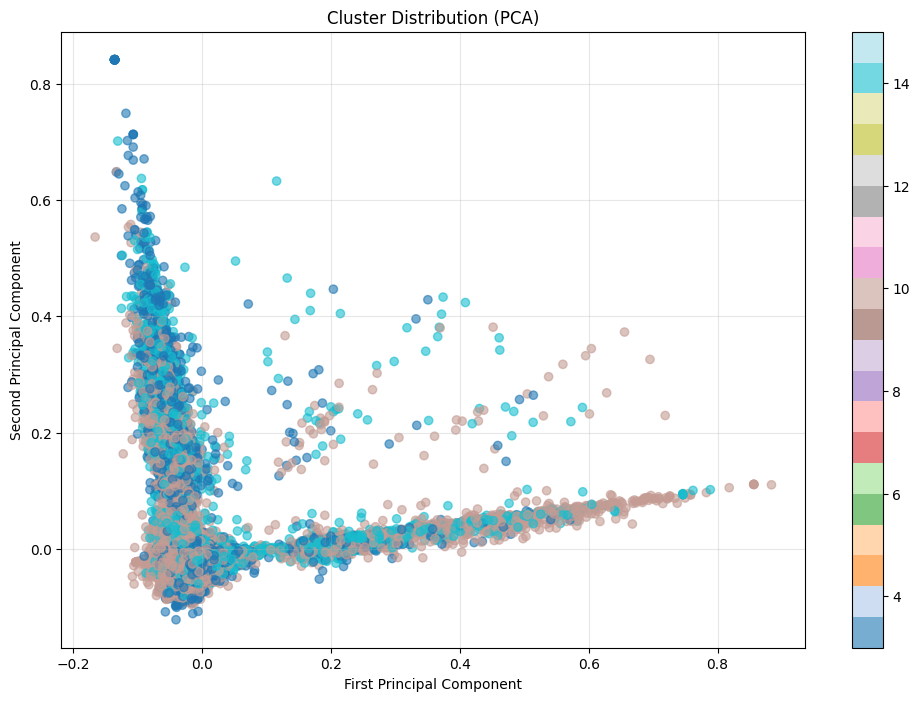

In [ ]:

def evaluate_clusters(train_labels, test_labels, X_train, X_test):
   # Print cluster distribution
   unique_clusters = np.unique(train_labels)
   print(f"\nNumber of unique clusters: {len(unique_clusters)}")
   print("\nCluster distribution:")
   for cluster in unique_clusters:
       count = np.sum(train_labels == cluster)
       print(f"Cluster {cluster}: {count} samples")

   # Training metrics
   train_silhouette = silhouette_score(X_train.toarray(), train_labels)
   train_ch = calinski_harabasz_score(X_train.toarray(), train_labels)
   train_db = davies_bouldin_score(X_train.toarray(), train_labels)

   # Test metrics
   test_silhouette = silhouette_score(X_test.toarray(), test_labels)
   test_ch = calinski_harabasz_score(X_test.toarray(), test_labels)
   test_db = davies_bouldin_score(X_test.toarray(), test_labels)

   print("\nTraining Metrics:")
   print(f"Silhouette Score: {train_silhouette:.3f}")
   print(f"Calinski-Harabasz Score: {train_ch:.3f}")
   print(f"Davies-Bouldin Score: {train_db:.3f}")

   print("\nTest Metrics:")
   print(f"Silhouette Score: {test_silhouette:.3f}")
   print(f"Calinski-Harabasz Score: {test_ch:.3f}")
   print(f"Davies-Bouldin Score: {test_db:.3f}")

   # Visualize clusters
   pca = PCA(n_components=2)
   X_train_2d = pca.fit_transform(X_train.toarray())

   plt.figure(figsize=(12, 8))
   scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=train_labels, cmap='tab20', alpha=0.6)
   plt.colorbar(scatter)
   plt.title('Cluster Distribution (PCA)')
   plt.xlabel('First Principal Component')
   plt.ylabel('Second Principal Component')
   plt.grid(True, alpha=0.3)
   plt.show()

# Train and evaluate
train_labels, test_labels, model = train_model(X_train_tfidf, X_test_tfidf)
evaluate_clusters(train_labels, test_labels, X_train_tfidf, X_test_tfidf)

# **K-MEANS CLUSTERING (Scikit-Learn): BHARATHI**

In [ ]:
!pip install torch torchvision umap-learn fastcluster --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 894.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load dataset using read_json with lines=True
df = pd.read_json('/content/news_category_dataset.json', lines=True)  # Use read_json for JSON files

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Combine Headline & Description for better features
df["combined_text"] = df["headline"] + " " + df["short_description"]

# Apply preprocessing
df["clean_text"] = df["combined_text"].apply(preprocess_text)

# Show processed text
df[["headline", "short_description", "clean_text"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


headline  \
0  A Call to Foundations to Step Up Giving, Act o...   
1   Cheapest U.S. Cities Located In Texas, Tennessee   
2                         The Father of Freakonomics   
3  9 Antioxidants That Can Help Prevent Premature...   
4  Weekend Roundup: How Will Greece Take Its Heml...   

                                   short_description  \
0  It's time foundations stepped up their game wh...   
1  A cautionary note: These cities are cheap in p...   
2  Dr. Becker won almost every award there was to...   
3  As we get older, it's normal for our skin to g...   
4  Ancient Greece was not only the birthplace of ...   

                                          clean_text  
0  call foundations step giving act climate time ...  
1  cheapest us cities located texas tennessee cau...  
2  father freakonomics dr becker almost every awa...  
3  9 antioxidants help prevent premature skin agi...  
4  weekend roundup greece take hemlock ancient gr...

### Convert Text to TF-IDF Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Optimized TF-IDF Vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000, stop_words="english")
X = vectorizer.fit_transform(df["clean_text"])

print(f"TF-IDF matrix shape: {X.shape}")  # (48442, 1000)


TF-IDF matrix shape: (48442, 1000)


### Use the Elbow Method to Find the Best K

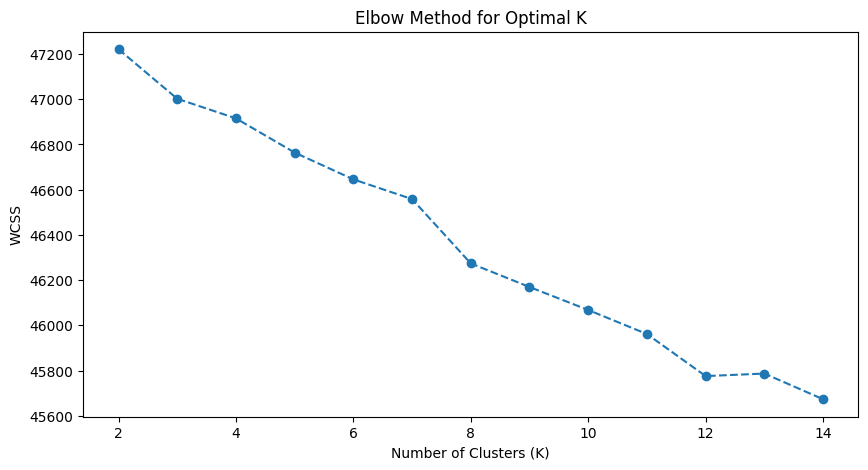

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(2, 15)  # Checking for K values from 2 to 15

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

# Plot Elbow Curve
plt.figure(figsize=(10,5))
plt.plot(K_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


### Apply K-Means Clustering

In [ ]:
# Set K from the elbow method
num_clusters = 14

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(X)

# Show cluster distribution
df["kmeans_cluster"].value_counts()


kmeans_cluster
3     29323
4      3170
11     2465
13     2204
12     2164
10     1593
6      1212
1      1171
2      1155
8      1132
0       781
9       726
7       685
5       661
Name: count, dtype: int64

### Visualizing K-Means Clustering

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


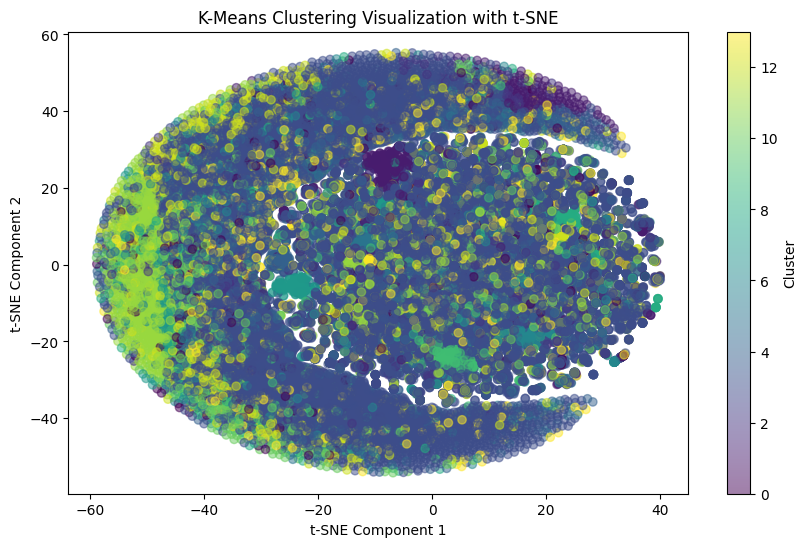

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensions using t-SNE (Use PCA-reduced data for speed)
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=500)
X_embedded = tsne.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df["kmeans_cluster"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering Visualization with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


### Evaluate K-Means Clustering Performance

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute evaluation metrics
silhouette = silhouette_score(X, df["kmeans_cluster"])
calinski = calinski_harabasz_score(X.toarray(), df["kmeans_cluster"])
davies = davies_bouldin_score(X.toarray(), df["kmeans_cluster"])

print(f"Silhouette Score: {silhouette:.4f} (Higher is better)")
print(f"Calinski-Harabasz Index: {calinski:.4f} (Higher is better)")
print(f"Davies-Bouldin Index: {davies:.4f} (Lower is better)")


Silhouette Score: 0.0158 (Higher is better)
Calinski-Harabasz Index: 146.9231 (Higher is better)
Davies-Bouldin Index: 6.2939 (Lower is better)


# **HIERARCHICAL CLUSTERING (PyTorch): Bharathi**

In [ ]:
import torch
import fastcluster
import scipy.cluster.hierarchy as sch

# Convert TF-IDF matrix to PyTorch tensor
X_torch = torch.tensor(X.toarray(), dtype=torch.float32)

# Sample 2000 points for Hierarchical Clustering (prevents crashes)
num_samples = 2000
subset_indices = torch.randperm(X_torch.shape[0])[:num_samples]
X_sampled = X_torch[subset_indices]

# Compute linkage matrix using fastcluster (faster than Scikit-Learn)
linkage_matrix = fastcluster.linkage_vector(X_sampled.numpy(), method="ward")

print(f"Linkage Matrix Shape: {linkage_matrix.shape}")


Linkage Matrix Shape: (1999, 4)


### Display the Dendrogram

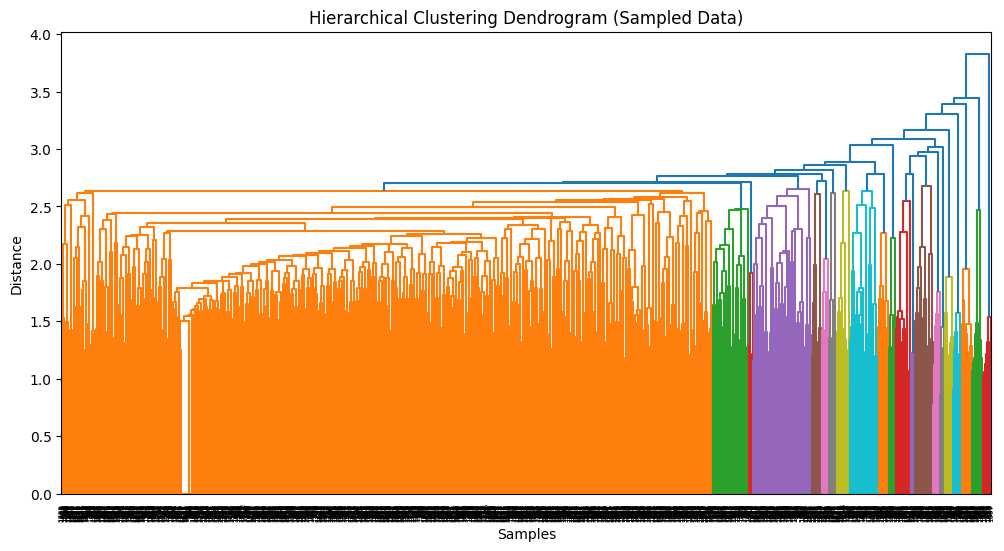

In [ ]:
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


### Extract Cluster Labels

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Define the cutoff distance to form clusters
max_d = 1

# Extract cluster labels
hierarchical_labels = fcluster(linkage_matrix, max_d, criterion="distance")

# Assign cluster labels to sampled subset
df.loc[subset_indices.numpy(), "hierarchical_cluster"] = hierarchical_labels

# Show cluster distribution
df["hierarchical_cluster"].value_counts()


hierarchical_cluster
1537.0    24
1668.0     4
57.0       4
28.0       4
713.0      3
          ..
1510.0     1
576.0      1
757.0      1
856.0      1
650.0      1
Name: count, Length: 1764, dtype: int64

### Evaluate Hierarchical Clustering Performance

In [ ]:
# Compute Cluster Evaluation Metrics
if len(set(hierarchical_labels)) > 1:
    silhouette = silhouette_score(X_sampled, hierarchical_labels)
    calinski = calinski_harabasz_score(X_sampled, hierarchical_labels)
    davies = davies_bouldin_score(X_sampled, hierarchical_labels)

    print(f"Silhouette Score: {silhouette:.4f} (Higher is better)")
    print(f"Calinski-Harabasz Index: {calinski:.4f} (Higher is better)")
    print(f"Davies-Bouldin Index: {davies:.4f} (Lower is better)")
else:
    print("Clustering failed: Only one cluster was formed. Try adjusting `max_d`.")


Silhouette Score: 0.0317 (Higher is better)
Calinski-Harabasz Index: 2.9282 (Higher is better)
Davies-Bouldin Index: 0.5253 (Lower is better)


## Additional Visualization for K-Means and Hierarchial Clustering

In [ ]:
!pip install umap-learn --quiet
import umap

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=50, random_state=42)
X_umap = umap_model.fit_transform(X.toarray())

# Apply K-Means on UMAP-Reduced Data
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["kmeans_cluster"] = kmeans.fit_predict(X_umap)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute Cluster Evaluation Metrics
silhouette = silhouette_score(X_pca, df["kmeans_cluster"])
calinski = calinski_harabasz_score(X_pca, df["kmeans_cluster"])
davies = davies_bouldin_score(X_pca, df["kmeans_cluster"])

print(f"Silhouette Score: {silhouette:.4f} (Higher is better)")
print(f"Calinski-Harabasz Index: {calinski:.4f} (Higher is better)")
print(f"Davies-Bouldin Index: {davies:.4f} (Lower is better)")


Silhouette Score: -0.0283 (Higher is better)
Calinski-Harabasz Index: 3.1938 (Higher is better)
Davies-Bouldin Index: 79.9524 (Lower is better)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


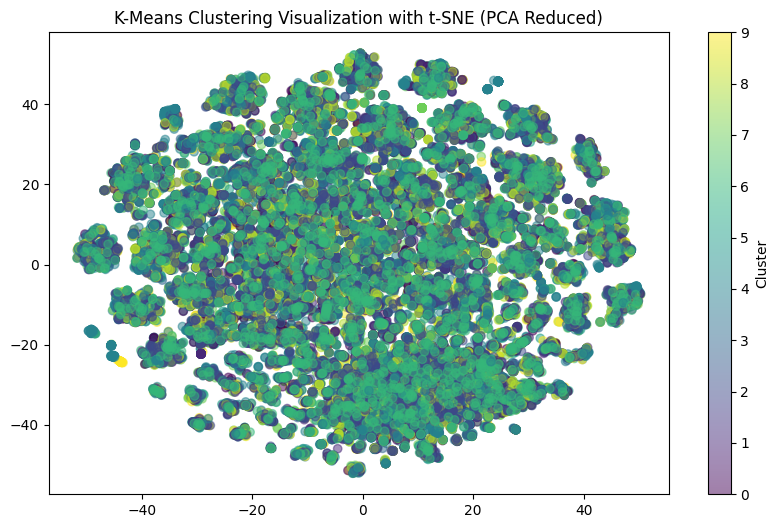

In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=500)
X_embedded = tsne.fit_transform(X_pca)  # Use PCA-reduced data for faster t-SNE

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df["kmeans_cluster"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering Visualization with t-SNE (PCA Reduced)")
plt.show()


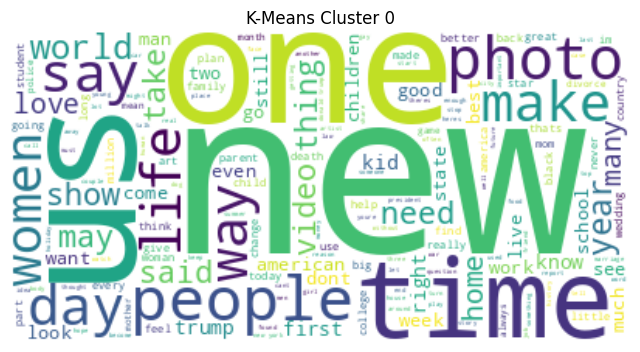

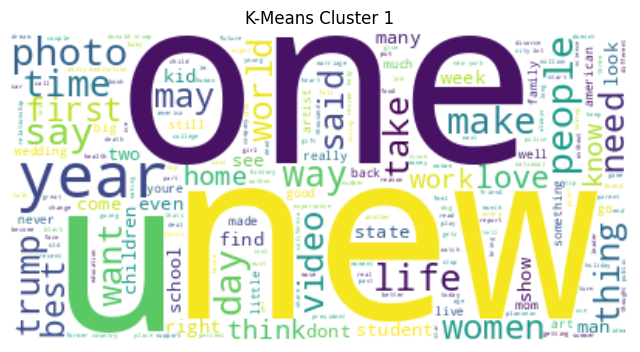

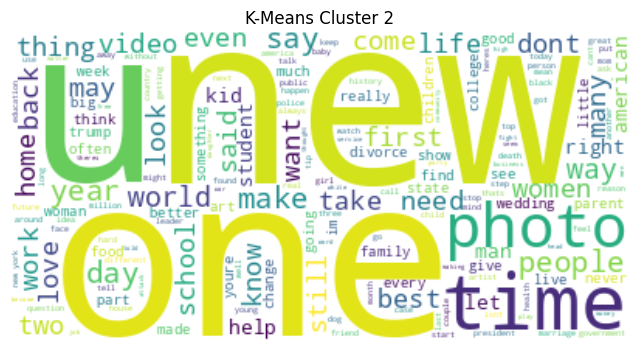

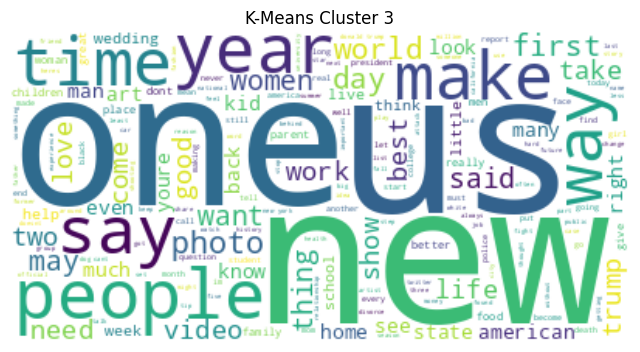

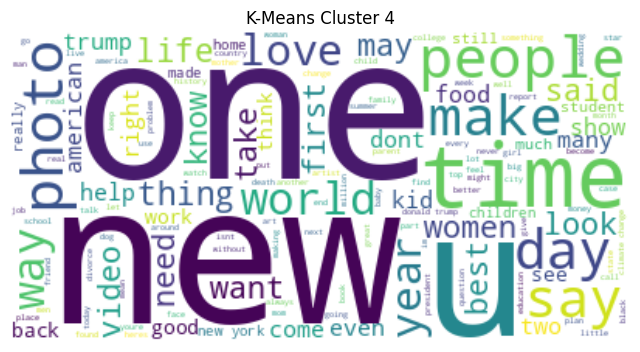

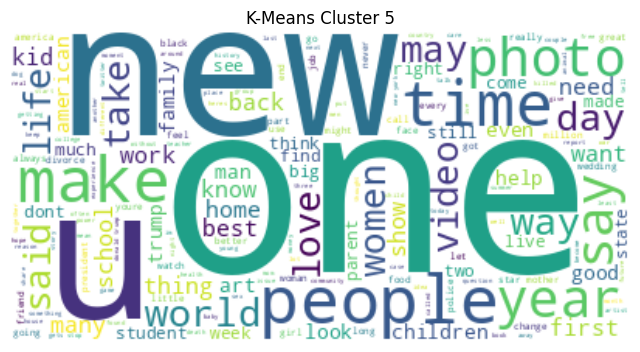

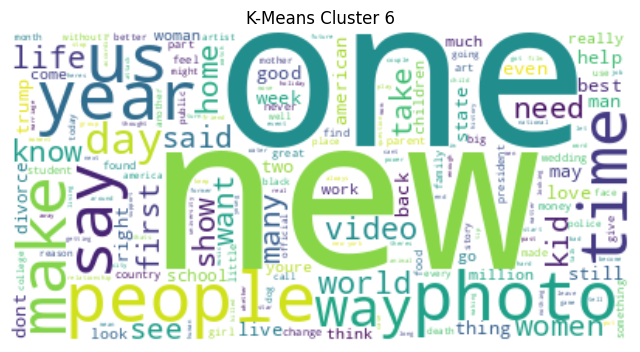

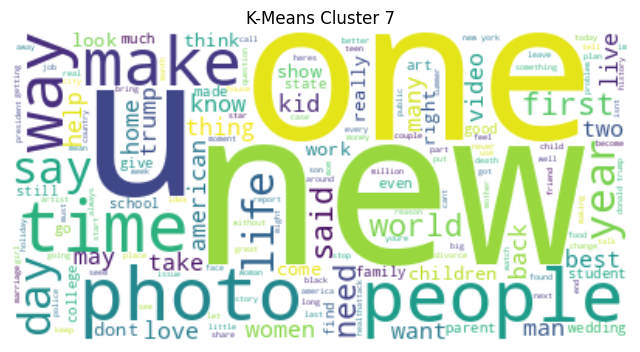

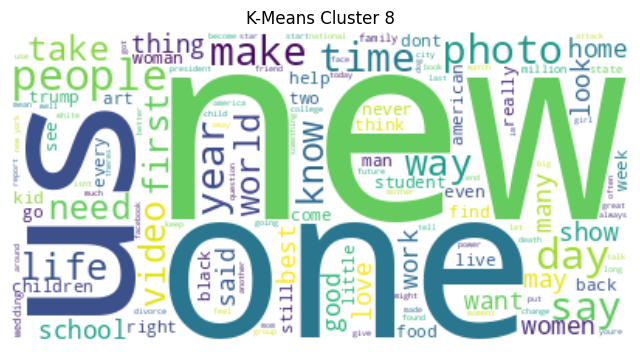

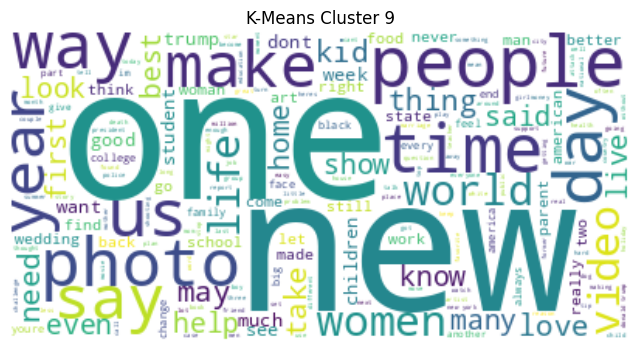

In [ ]:
from wordcloud import WordCloud

for cluster in range(num_clusters):
    plt.figure(figsize=(8, 6))
    cluster_texts = " ".join(df[df["kmeans_cluster"] == cluster]["clean_text"])
    wordcloud = WordCloud(background_color="white").generate(cluster_texts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"K-Means Cluster {cluster}")
    plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Reduce TF-IDF dimensions before Hierarchical Clustering
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X.toarray())

print(f"Original TF-IDF dimensions: {X.shape[1]}")
print(f"Reduced PCA dimensions: {X_pca.shape[1]}")


Original TF-IDF dimensions: 5000
Reduced PCA dimensions: 50


In [ ]:
import umap

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=50, random_state=42)
X_umap = umap_model.fit_transform(X.toarray())

print(f"Original TF-IDF dimensions: {X.shape[1]}")
print(f"Reduced UMAP dimensions: {X_umap.shape[1]}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Original TF-IDF dimensions: 5000
Reduced UMAP dimensions: 50


In [ ]:
# Get dataset shape
num_samples, num_features = df.shape

print(f"Number of samples (rows): {num_samples}")
print(f"Number of features (columns): {num_features}")


Number of samples (rows): 48442
Number of features (columns): 9


In [ ]:
print(df.info())  # Shows number of entries and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48442 entries, 0 to 48441
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   link               48442 non-null  object        
 1   headline           48442 non-null  object        
 2   category           48442 non-null  object        
 3   short_description  48442 non-null  object        
 4   authors            48442 non-null  object        
 5   date               48442 non-null  datetime64[ns]
 6   combined_text      48442 non-null  object        
 7   clean_text         48442 non-null  object        
 8   kmeans_cluster     48442 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(7)
memory usage: 3.1+ MB
None


In [ ]:
print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (48442, 5000)


In [ ]:
print(f"PCA reduced shape: {X_pca.shape}")
print(f"UMAP reduced shape: {X_umap.shape}")


PCA reduced shape: (48442, 50)
UMAP reduced shape: (48442, 50)


In [ ]:
from sklearn.decomposition import PCA
import umap

# Reduce dimensions with PCA
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Reduce dimensions with UMAP (Optional, works better than PCA for text data)
umap_model = umap.UMAP(n_components=50, random_state=42)
X_umap = umap_model.fit_transform(X.toarray())

print(f"PCA reduced shape: {X_pca.shape}")
print(f"UMAP reduced shape: {X_umap.shape}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


PCA reduced shape: (48442, 50)
UMAP reduced shape: (48442, 50)


In [ ]:
import numpy as np

# Select a smaller subset (2000 samples)
num_samples = 2000
subset_indices = np.random.choice(X_pca.shape[0], num_samples, replace=False)
X_sampled = X_pca[subset_indices]



In [ ]:
!pip install fastcluster

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.0/195.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
import scipy.cluster.hierarchy as sch
import fastcluster

# Compute the linkage matrix (Fast Agglomerative Clustering)
linkage_matrix = fastcluster.linkage_vector(X_sampled, method='ward')

print(f"Linkage Matrix Shape: {linkage_matrix.shape}")


Linkage Matrix Shape: (1999, 4)


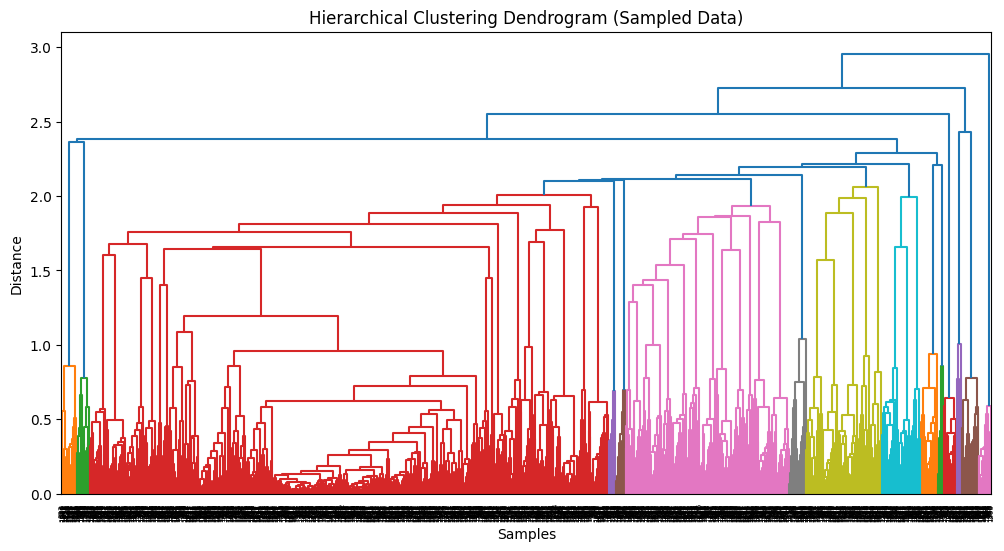

In [ ]:
import matplotlib.pyplot as plt

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Sampled Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Define a distance threshold to cut the dendrogram
max_d = 10  # Adjust based on dendrogram

# Get cluster labels
hierarchical_labels = fcluster(linkage_matrix, max_d, criterion="distance")

# Assign cluster labels to the dataset
df.loc[subset_indices, "hierarchical_cluster"] = hierarchical_labels

# Show cluster distribution
df["hierarchical_cluster"].value_counts()


hierarchical_cluster
1.0    2000
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


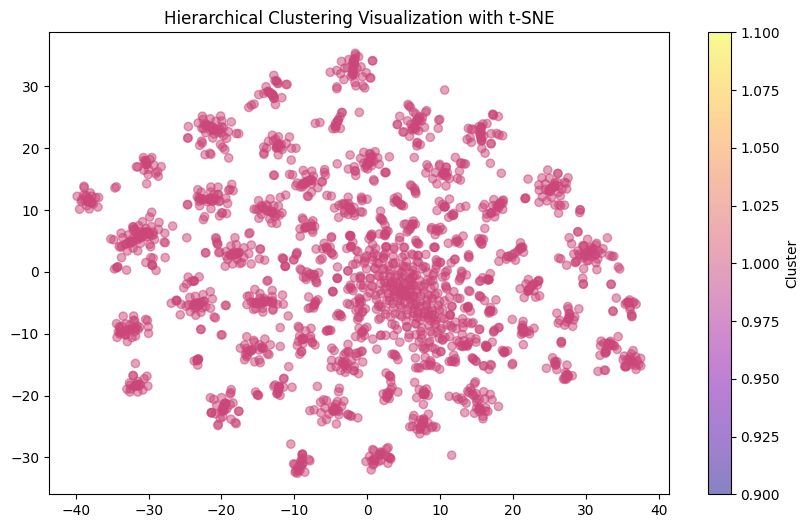

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=500)
X_embedded = tsne.fit_transform(X_sampled)

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=hierarchical_labels, cmap="plasma", alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("Hierarchical Clustering Visualization with t-SNE")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


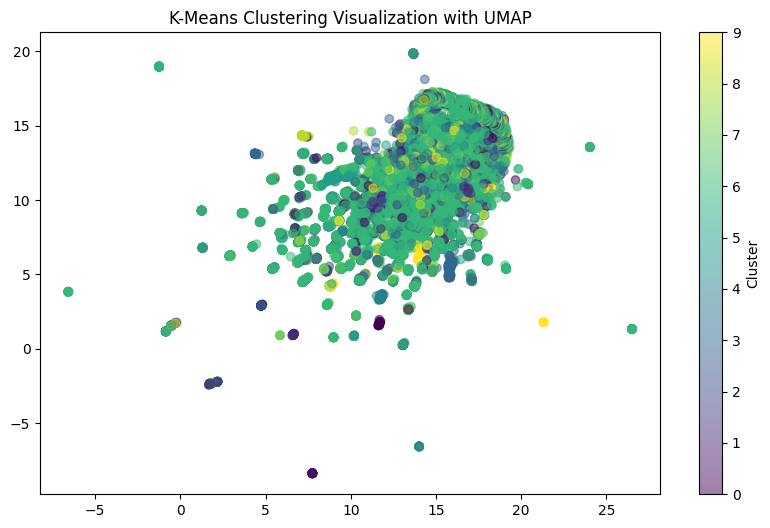

In [ ]:
!pip install umap-learn

import umap

# Apply UMAP (faster alternative to t-SNE)
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X.toarray())

# Plot UMAP clusters
plt.figure(figsize=(10,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c=df["kmeans_cluster"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering Visualization with UMAP")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


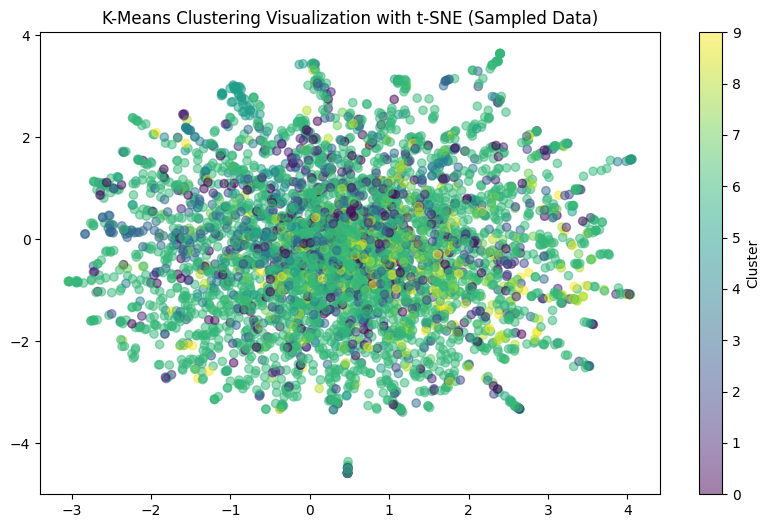

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Reduce dataset size for t-SNE (use 5000 random samples)
num_samples = 5000
subset_indices = np.random.choice(X.shape[0], num_samples, replace=False)
X_sampled = X[subset_indices].toarray()
clusters_sampled = df["kmeans_cluster"].iloc[subset_indices].values

# Apply t-SNE on sampled data
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=500)
X_embedded = tsne.fit_transform(X_sampled)

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=clusters_sampled, cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering Visualization with t-SNE (Sampled Data)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


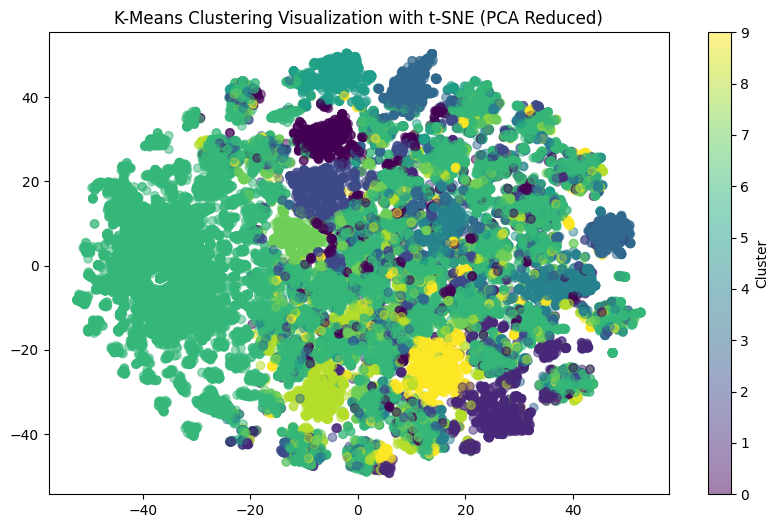

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions with PCA before t-SNE
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Apply t-SNE on PCA-reduced data
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=500)
X_embedded = tsne.fit_transform(X_pca)

# Plot clusters
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df["kmeans_cluster"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering Visualization with t-SNE")
plt.show()


## Mean Shift Clustering: YUGM

In [ ]:
import pandas as pd

df = pd.read_json("/content/news_category_dataset.json", lines=True)

# Display basic info
print(df.head())
print(df.info())
print(df.describe())

                                                link  \
0  https://www.huffingtonpost.com/entry/a-call-to...   
1  https://www.huffingtonpost.com/entry/cheapest-...   
2  https://www.huffingtonpost.com/entry/the-fathe...   
3  https://www.huffingtonpost.com/entry/personal-...   
4  https://www.huffingtonpost.com/entry/weekend-r...   

                                            headline   category  \
0  A Call to Foundations to Step Up Giving, Act o...      GREEN   
1   Cheapest U.S. Cities Located In Texas, Tennessee      MONEY   
2                         The Father of Freakonomics    COLLEGE   
3  9 Antioxidants That Can Help Prevent Premature...   WELLNESS   
4  Weekend Roundup: How Will Greece Take Its Heml...  WORLDPOST   

                                   short_description  \
0  It's time foundations stepped up their game wh...   
1  A cautionary note: These cities are cheap in p...   
2  Dr. Becker won almost every award there was to...   
3  As we get older, it's normal for 

In [ ]:
print(df.dtypes)

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'category' column into numerical values
le = LabelEncoder()
df["category"] = le.fit_transform(df["category"])

# Check transformation
print(df["category"].head())

0    15
1    21
2     4
3    38
4    41
Name: category, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize 'headline' and 'short_description' using TF-IDF
vectorizer = TfidfVectorizer(max_features=100)  # Limit to 100 important words
headline_tfidf = vectorizer.fit_transform(df["headline"].fillna(""))  # Fill NaNs with empty strings
desc_tfidf = vectorizer.fit_transform(df["short_description"].fillna(""))

# Convert TF-IDF matrices into DataFrames
headline_df = pd.DataFrame(headline_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
desc_df = pd.DataFrame(desc_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Combine with main dataset
df = pd.concat([df, headline_df, desc_df], axis=1)

# Drop original text columns
df.drop(["headline", "short_description", "link", "authors"], axis=1, inplace=True)

print(df.head())

   category       date  about  after  all   an  and  are   as   at  ...  who  \
0        15 2015-04-23    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1        21 2012-06-12    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2         4 2014-11-03    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3        38 2013-11-07    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4        41 2015-07-03    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

      will  with  women  world  would  year  years  you  your  
0  0.00000   0.0    0.0    0.0    0.0   0.0    0.0  0.0   0.0  
1  0.00000   0.0    0.0    0.0    0.0   0.0    0.0  0.0   0.0  
2  0.00000   0.0    0.0    0.0    0.0   0.0    0.0  0.0   0.0  
3  0.00000   0.0    0.0    0.0    0.0   0.0    0.0  0.0   0.0  
4  0.33519   0.0    0.0    0.0    0.0   0.0    0.0  0.0   0.0  

[5 rows x 202 columns]


In [ ]:
# Extract features from date
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["weekday"] = df["date"].dt.weekday

# Drop original 'date' column
df.drop("date", axis=1, inplace=True)

print(df.head())

   category  about  after  all   an  and  are   as   at   be  ...  with  \
0        15    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1        21    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2         4    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3        38    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4        41    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

   women  world  would  year  years  you  your  month  weekday  
0    0.0    0.0    0.0  2015    0.0  0.0   0.0      4        3  
1    0.0    0.0    0.0  2012    0.0  0.0   0.0      6        1  
2    0.0    0.0    0.0  2014    0.0  0.0   0.0     11        0  
3    0.0    0.0    0.0  2013    0.0  0.0   0.0     11        3  
4    0.0    0.0    0.0  2015    0.0  0.0   0.0      7        4  

[5 rows x 203 columns]


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import pandas as pd

# Reduce sample size to speed up processing
df_sample = df.sample(frac=0.05, random_state=42).dropna()  # Use 5% instead of 10%
df_sample = df_sample.select_dtypes(include=['number'])  # Keep only numeric columns

# Estimate bandwidth with a subset of data for efficiency
bandwidth = estimate_bandwidth(df_sample, quantile=0.2, n_samples=500)

# Fit MeanShift with optimized bandwidth
mean_shift = MeanShift(bandwidth=bandwidth)
clusters = mean_shift.fit_predict(df_sample)

print("Number of clusters in sample:", len(set(clusters)))


Number of clusters in sample: 2


In [ ]:
# Display cluster distribution
print("Cluster distribution:")
print(pd.Series(clusters).value_counts())

Cluster distribution:
0    1397
1    1025
Name: count, dtype: int64


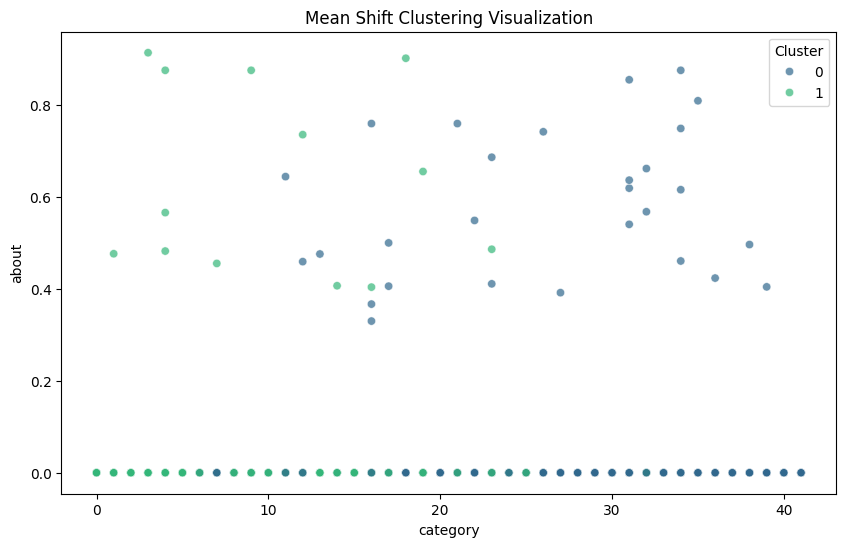

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters (assuming the reduced dataset has at least 2 features)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_sample.iloc[:, 0], y=df_sample.iloc[:, 1], hue=clusters, palette="viridis", alpha=0.7)
plt.xlabel(df_sample.columns[0])
plt.ylabel(df_sample.columns[1])
plt.title("Mean Shift Clustering Visualization")
plt.legend(title="Cluster")
plt.show()


## Gaussian Mixture Model(GMM): YUGM

In [ ]:
import torch
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (JSON format with lines=True)
df = pd.read_json("/content/news_category_dataset.json", lines=True)

# Inspect dataset structure
print(df.head())

# Select a text column for clustering (modify based on your dataset)
text_column = "headline"  # Change to the correct column name
vectorizer = TfidfVectorizer(max_features=500)  # Convert text to numerical features
text_features = vectorizer.fit_transform(df[text_column].astype(str)).toarray()

# Convert to PyTorch tensor
data = torch.tensor(text_features, dtype=torch.float32)

# Now proceed with GMM clustering as before
print("Preprocessed data shape:", data.shape)

                                                link  \
0  https://www.huffingtonpost.com/entry/a-call-to...   
1  https://www.huffingtonpost.com/entry/cheapest-...   
2  https://www.huffingtonpost.com/entry/the-fathe...   
3  https://www.huffingtonpost.com/entry/personal-...   
4  https://www.huffingtonpost.com/entry/weekend-r...   

                                            headline   category  \
0  A Call to Foundations to Step Up Giving, Act o...      GREEN   
1   Cheapest U.S. Cities Located In Texas, Tennessee      MONEY   
2                         The Father of Freakonomics    COLLEGE   
3  9 Antioxidants That Can Help Prevent Premature...   WELLNESS   
4  Weekend Roundup: How Will Greece Take Its Heml...  WORLDPOST   

                                   short_description  \
0  It's time foundations stepped up their game wh...   
1  A cautionary note: These cities are cheap in p...   
2  Dr. Becker won almost every award there was to...   
3  As we get older, it's normal for 

In [ ]:
import torch
from torch.distributions import MultivariateNormal

# Number of clusters and data points
K = 3  # Example: Assume 3 clusters
N = 100  # Example: Assume 100 data points
D = 2  # Example: 2D feature space

# Generate synthetic data (Replace this with actual data)
data = torch.randn(N, D)

# Initialize means, covariances, and weights randomly
means = torch.randn(K, D)  # Random cluster centers
covariances = torch.stack([torch.eye(D) for _ in range(K)])  # Identity matrices
weights = torch.ones(K) / K  # Equal weights for each cluster

# Small constant for numerical stability
epsilon = 1e-6

# Ensure covariance matrices are positive definite
covariances += torch.eye(D) * epsilon  # Add small value to diagonal

# Compute responsibilities (E-step)
log_responsibilities = torch.zeros(N, K)

for k in range(K):
    mvn = MultivariateNormal(means[k], covariances[k])  # Gaussian distribution
    log_responsibilities[:, k] = torch.log(weights[k] + epsilon) + mvn.log_prob(data)  # Log-space computation

# Convert log responsibilities to probabilities using softmax (avoiding underflow)
responsibilities = torch.nn.functional.softmax(log_responsibilities, dim=1)

# Ensure responsibilities sum to 1
responsibility_sums = responsibilities.sum(dim=1)
print("Sum of responsibilities per data point (should be ~1):", responsibility_sums[:10])

# Check for NaN or Inf values
if torch.isnan(responsibilities).any() or torch.isinf(responsibilities).any():
    print("Warning: NaN or Inf values found in responsibilities!")
else:
    print("Responsibilities calculated correctly.")


Sum of responsibilities per data point (should be ~1): tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
Responsibilities calculated correctly.


In [ ]:
# Compute new means (M-step)
N_k = responsibilities.sum(dim=0)  # Sum of responsibilities for each cluster (shape: K)
new_means = (responsibilities.T @ data) / N_k.unsqueeze(1)  # Weighted sum over data


# Compute new covariances (M-step)
new_covariances = torch.zeros_like(covariances)  # Initialize new covariances

for k in range(K):
    X_centered = data - new_means[k]  # Centered data
    weighted_X_centered = X_centered.T @ (X_centered * responsibilities[:, k].unsqueeze(1))
    new_covariances[k] = weighted_X_centered / N_k[k] + torch.eye(D) * 1e-6  # Ensure positive definite


# Compute new weights (M-step)
new_weights = N_k / N


# Update parameters
means = new_means
covariances = new_covariances
weights = new_weights

print("Updated means:", means)
print("Updated covariances:", covariances)
print("Updated weights:", weights)

Updated means: tensor([[ 0.3400,  0.3269],
        [-0.9036, -0.1305],
        [ 0.5571, -1.2514]])
Updated covariances: tensor([[[0.7826, 0.2295],
         [0.2295, 1.0090]],

        [[0.5982, 0.0745],
         [0.0745, 0.7779]],

        [[0.7694, 0.2235],
         [0.2235, 0.7044]]])
Updated weights: tensor([0.5422, 0.2821, 0.1757])


In [ ]:
# GMM Iteration Loop
max_iters = 100  # Set maximum iterations
tolerance = 1e-3  # Convergence threshold
prev_log_likelihood = -torch.inf  # Track log-likelihood for convergence

for i in range(max_iters):
    # E-step: Compute responsibilities
    log_responsibilities = torch.zeros(N, K)

    for k in range(K):
        mvn = MultivariateNormal(means[k], covariances[k])
        log_responsibilities[:, k] = torch.log(weights[k] + 1e-6) + mvn.log_prob(data)

    responsibilities = torch.nn.functional.softmax(log_responsibilities, dim=1)

    # M-step: Update means, covariances, and weights
    N_k = responsibilities.sum(dim=0)
    new_means = (responsibilities.T @ data) / N_k.unsqueeze(1)

    new_covariances = torch.zeros_like(covariances)
    for k in range(K):
        X_centered = data - new_means[k]
        weighted_X_centered = X_centered.T @ (X_centered * responsibilities[:, k].unsqueeze(1))
        new_covariances[k] = weighted_X_centered / N_k[k] + torch.eye(D) * 1e-6

    new_weights = N_k / N

    # Check convergence (log-likelihood)
    log_likelihood = log_responsibilities.exp().sum(dim=1).log().sum()
    if torch.abs(log_likelihood - prev_log_likelihood) < tolerance:
        print(f"Converged at iteration {i}")
        break
    prev_log_likelihood = log_likelihood

    # Update parameters
    means, covariances, weights = new_means, new_covariances, new_weights

print("Final means:", means)
print("Final covariances:", covariances)
print("Final weights:", weights)

Final means: tensor([[ 0.1280,  0.4382],
        [-1.1202, -0.8523],
        [ 0.8403, -1.2317]])
Final covariances: tensor([[[ 0.8375,  0.2312],
         [ 0.2312,  0.7709]],

        [[ 0.4096, -0.3554],
         [-0.3554,  0.7128]],

        [[ 0.5959,  0.2324],
         [ 0.2324,  0.4938]]])
Final weights: tensor([0.6495, 0.1787, 0.1718])


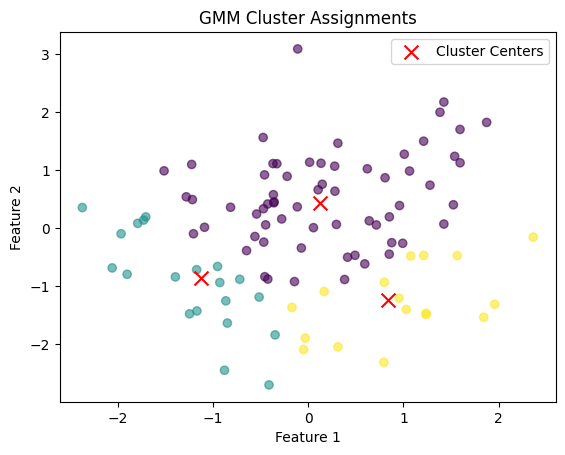

In [ ]:
import matplotlib.pyplot as plt

# Assign each point to the cluster with the highest responsibility
cluster_assignments = torch.argmax(responsibilities, dim=1).numpy()

# Scatter plot of data colored by cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6)

# Plot cluster centers (means)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("GMM Cluster Assignments")
plt.show()

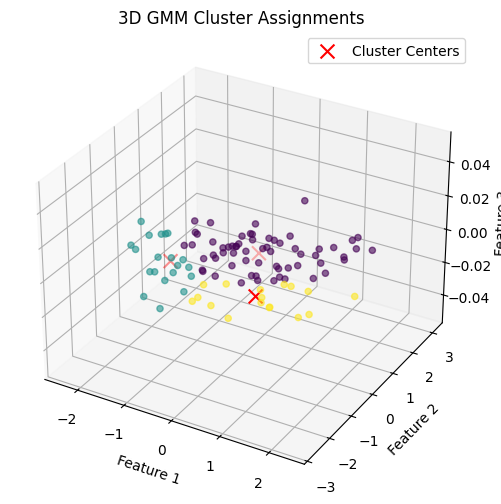

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ensure data has 3 dimensions
if data.shape[1] < 3:
    print("Warning: Data has less than 3 dimensions! Adding a dummy third dimension.")
    data = torch.cat((data, torch.zeros(data.shape[0], 1)), dim=1)  # Add column of zeros

# Ensure means (cluster centers) also have 3 dimensions
if means.shape[1] < 3:
    print("Warning: Cluster centers have less than 3 dimensions! Adding a dummy third dimension.")
    means = torch.cat((means, torch.zeros(means.shape[0], 1)), dim=1)  # Add column of zeros

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=cluster_assignments, cmap='viridis', alpha=0.6)
ax.scatter(means[:, 0], means[:, 1], means[:, 2], c='red', marker='x', s=100, label='Cluster Centers')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.title("3D GMM Cluster Assignments")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data.numpy(), cluster_assignments)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2779


In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(data.numpy(), cluster_assignments)
print(f"Davies-Bouldin Index: {db_score:.4f}")

Davies-Bouldin Index: 0.9507
